In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import warnings
#warnings.filterwarnings("ignore")

In [2]:
#Reading CSV file
df = pd.read_csv("D:\Projects\Anemia Detection\AnemiaDataCSV.csv")

# Data Cleaning

In [3]:
#DataFrame
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [4]:
#Checking Null Values in DataFrame
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [5]:
#Checking Duplicate values in DataFrame
df.duplicated().sum()

np.int64(887)

In [6]:
#Deleting duplicate values and Committing
df.drop_duplicates(inplace = True)

In [7]:
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
946,0,11.8,21.2,28.4,98.1,1
1156,1,15.1,21.3,32.4,100.6,0
1160,1,14.8,19.5,32.2,72.1,0
1376,1,13.2,20.4,28.0,97.4,1


In [8]:
#Resetting the disturbed Index
df.reset_index(inplace = True, drop = True)

In [9]:
df.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

In [10]:
#Setting Gender as categorical data as we display it in "0 & 1"
df.Gender.astype("category")

0      1
1      0
2      0
3      0
4      1
      ..
529    0
530    1
531    1
532    1
533    1
Name: Gender, Length: 534, dtype: category
Categories (2, int64): [0, 1]

In [11]:
#Final DataFrame
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
529,0,11.8,21.2,28.4,98.1,1
530,1,15.1,21.3,32.4,100.6,0
531,1,14.8,19.5,32.2,72.1,0
532,1,13.2,20.4,28.0,97.4,1


# EDA(Exploratory Data Analysis)

In [12]:
#Description or Summary for DataFrame
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.522472,13.287079,22.911985,30.249438,85.647004,0.462547
std,0.499963,2.066276,3.948482,1.412312,9.604934,0.499063
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.600000,19.500000,29.000000,77.325000,0.000000
50%,1.000000,13.100000,22.750000,30.400000,85.450000,0.000000
75%,1.000000,14.975000,26.100000,31.475000,94.150000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


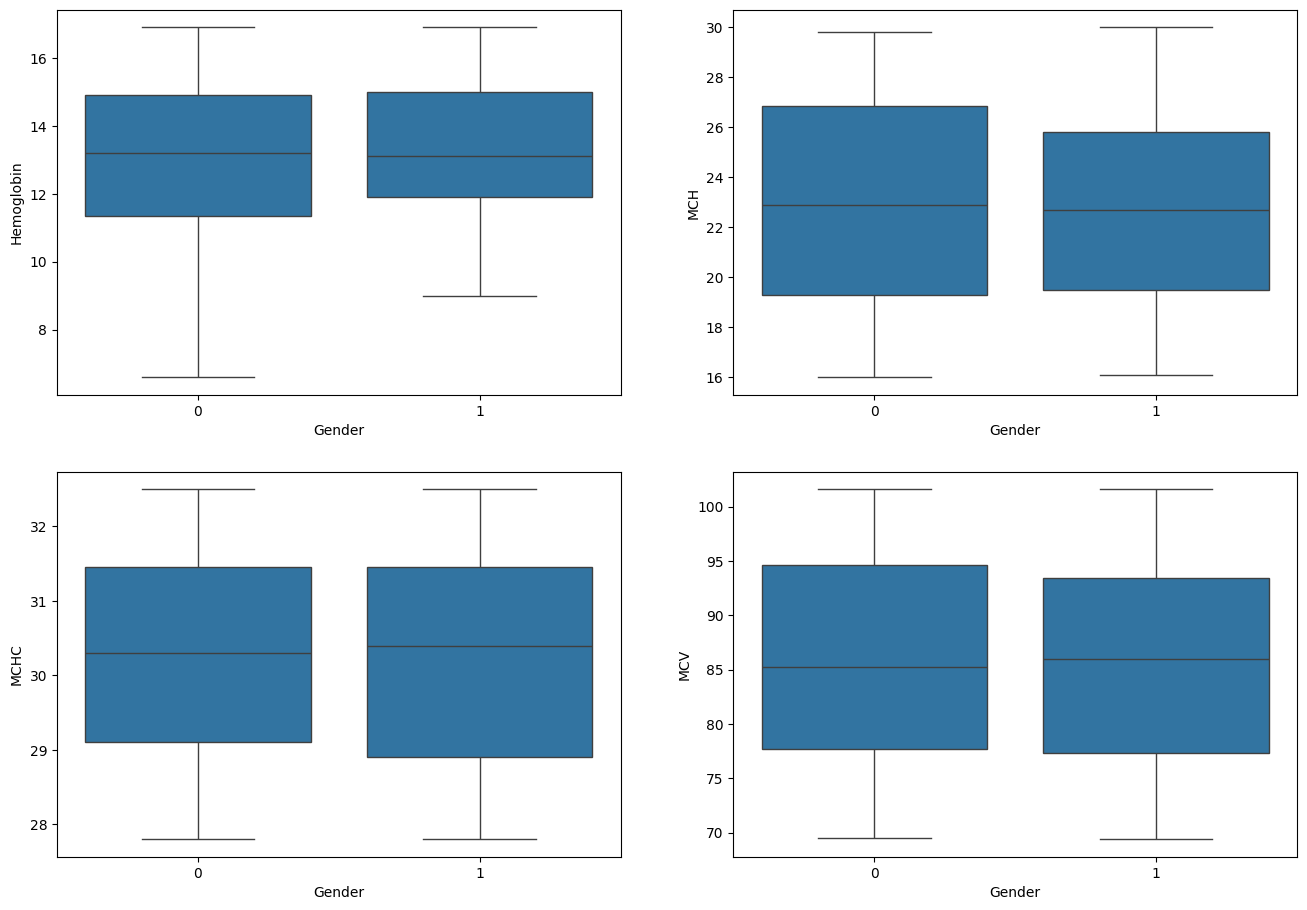

In [13]:
#PLotting a Box plot
plt.figure(figsize = (16,11))


plt.subplot(2,2,1)
sns.boxplot(x = df.Gender, y = df.Hemoglobin)


plt.subplot(2,2,2)
sns.boxplot(x = df.Gender, y = df.MCH)


plt.subplot(2,2,3)
sns.boxplot(x = df.Gender, y = df.MCHC)


plt.subplot(2,2,4)
sns.boxplot(x = df.Gender, y = df.MCV)

plt.show()

In [14]:
#Average values after grouping by Gender
a = df.groupby('Gender').mean()
a

,Hemoglobin,MCH,MCHC,MCV,Result
Gender,,,,,
0,13.166667,22.980000,30.255294,85.854902,0.345098
1,13.397133,22.849821,30.244086,85.456989,0.569892


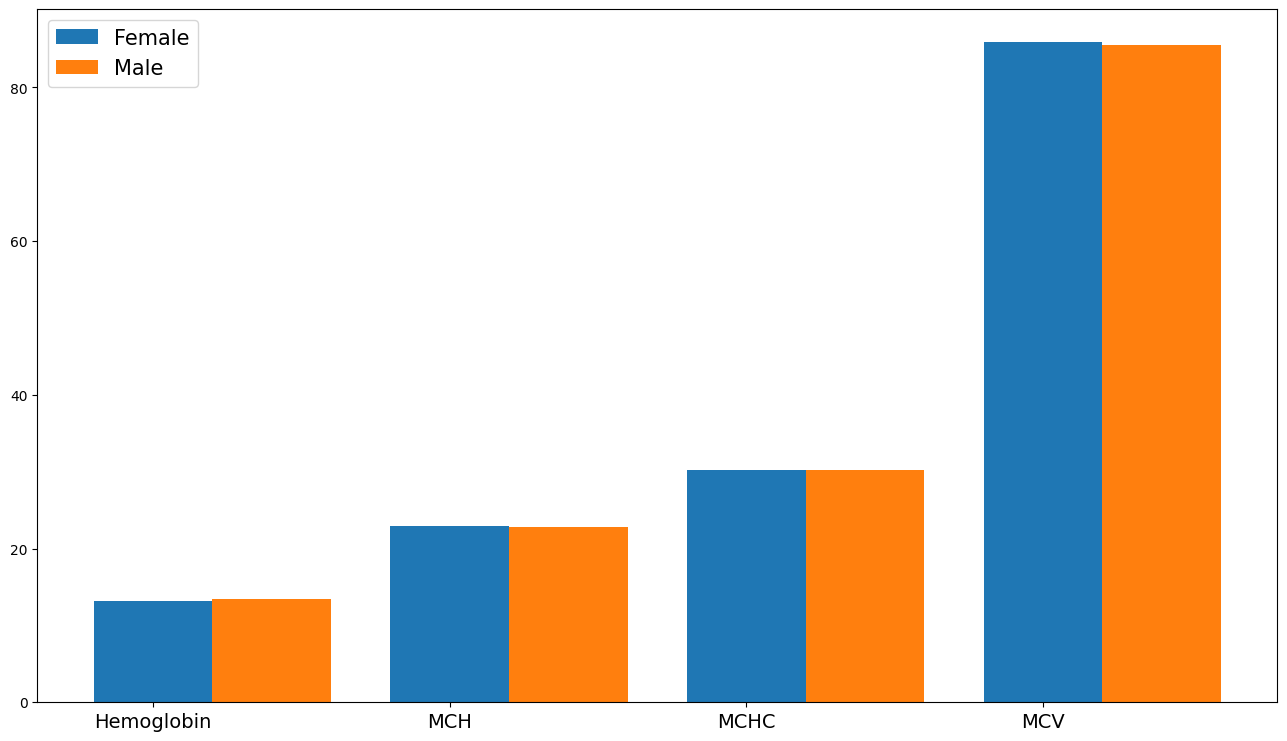

In [15]:
#Plotting Bar Graph
plt.figure(figsize = (16, 9))
widths = 0.4

plt.bar(np.arange(4), a.iloc[0,:-1], width = 0.4, label = "Female")
plt.bar(np.arange(4) + widths, a.iloc[1,:-1], width = 0.4, label = "Male")

plt.xticks(ticks = np.arange(4), labels = a.columns[:-1], size = 14)
plt.legend(fontsize = 15)

plt.show()

In [16]:
#Maximum values after grouping by Gender
b = df.groupby("Gender").max()
b

,Hemoglobin,MCH,MCHC,MCV,Result
Gender,,,,,
0,16.9,29.8,32.5,101.6,1
1,16.9,30.0,32.5,101.6,1


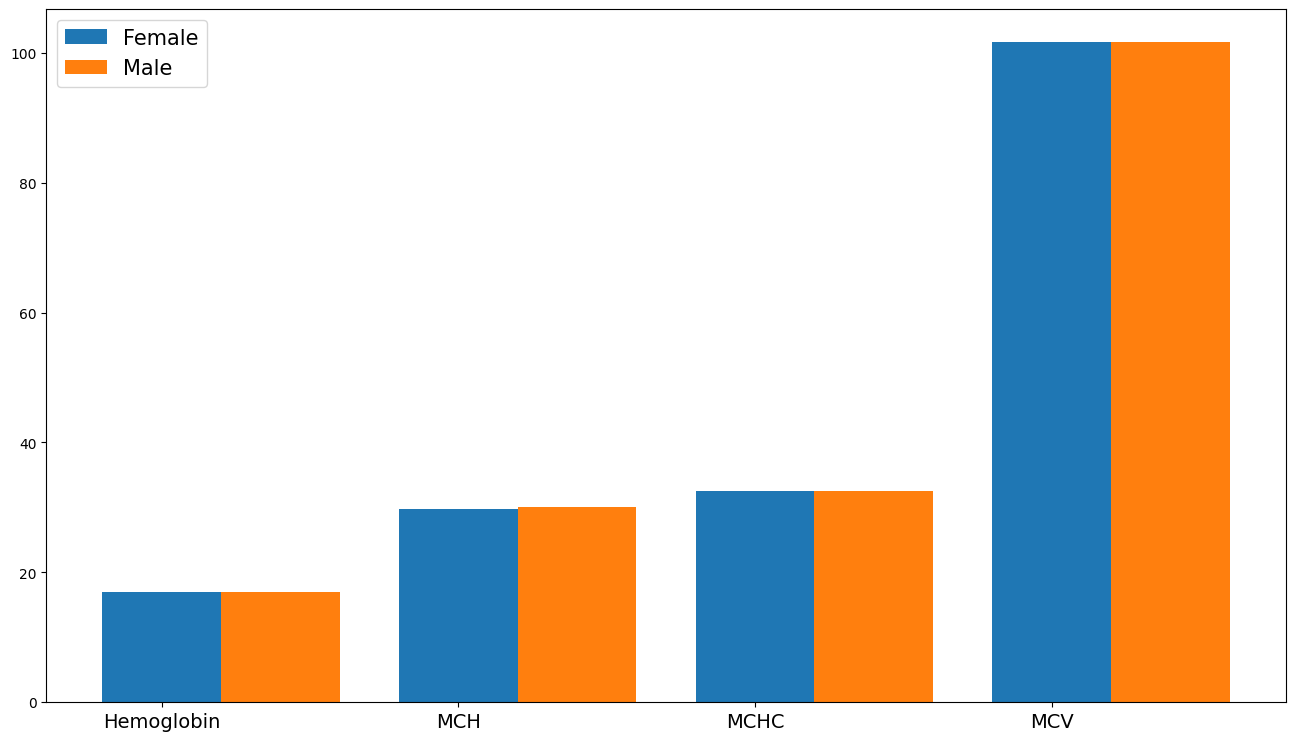

In [17]:
#Plotting Bar Graph
plt.figure(figsize = (16, 9))
widths = 0.4

plt.bar(np.arange(4), b.iloc[0,:-1], width = 0.4, label = "Female")
plt.bar(np.arange(4) + widths, b.iloc[1,:-1], width = 0.4, label = "Male")

plt.xticks(ticks = np.arange(4), labels = b.columns[:-1], size = 14)
plt.legend(fontsize = 15)

plt.show()

In [18]:
#Minimum values after grouping by Gender
c = df.groupby("Gender").min()
c

,Hemoglobin,MCH,MCHC,MCV,Result
Gender,,,,,
0,6.6,16.0,27.8,69.5,0
1,9.0,16.1,27.8,69.4,0


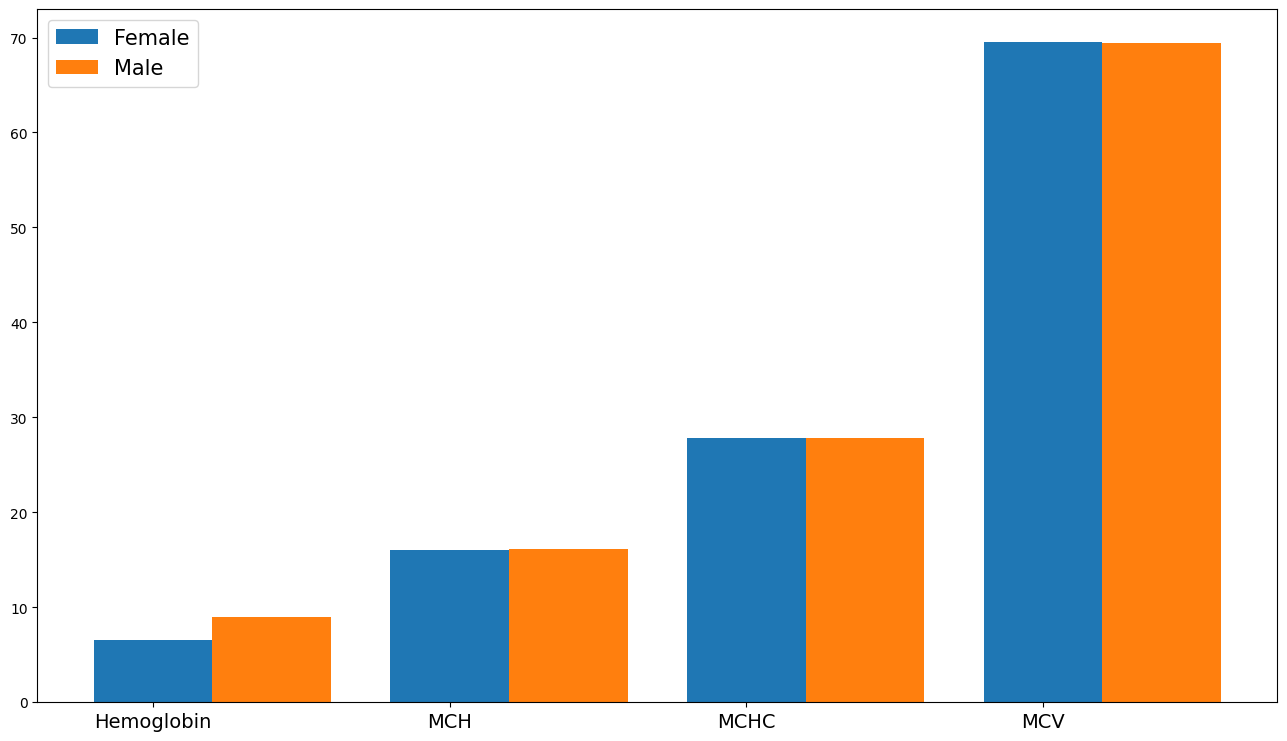

In [19]:
#Plotting Bar Graph
plt.figure(figsize = (16, 9))
widths = 0.4

plt.bar(np.arange(4), c.iloc[0,:-1], width = 0.4, label = "Female")
plt.bar(np.arange(4) + widths, c.iloc[1,:-1], width = 0.4, label = "Male")

plt.xticks(ticks = np.arange(4), labels = c.columns[:-1], size = 14)
plt.legend(fontsize = 15)

plt.show()

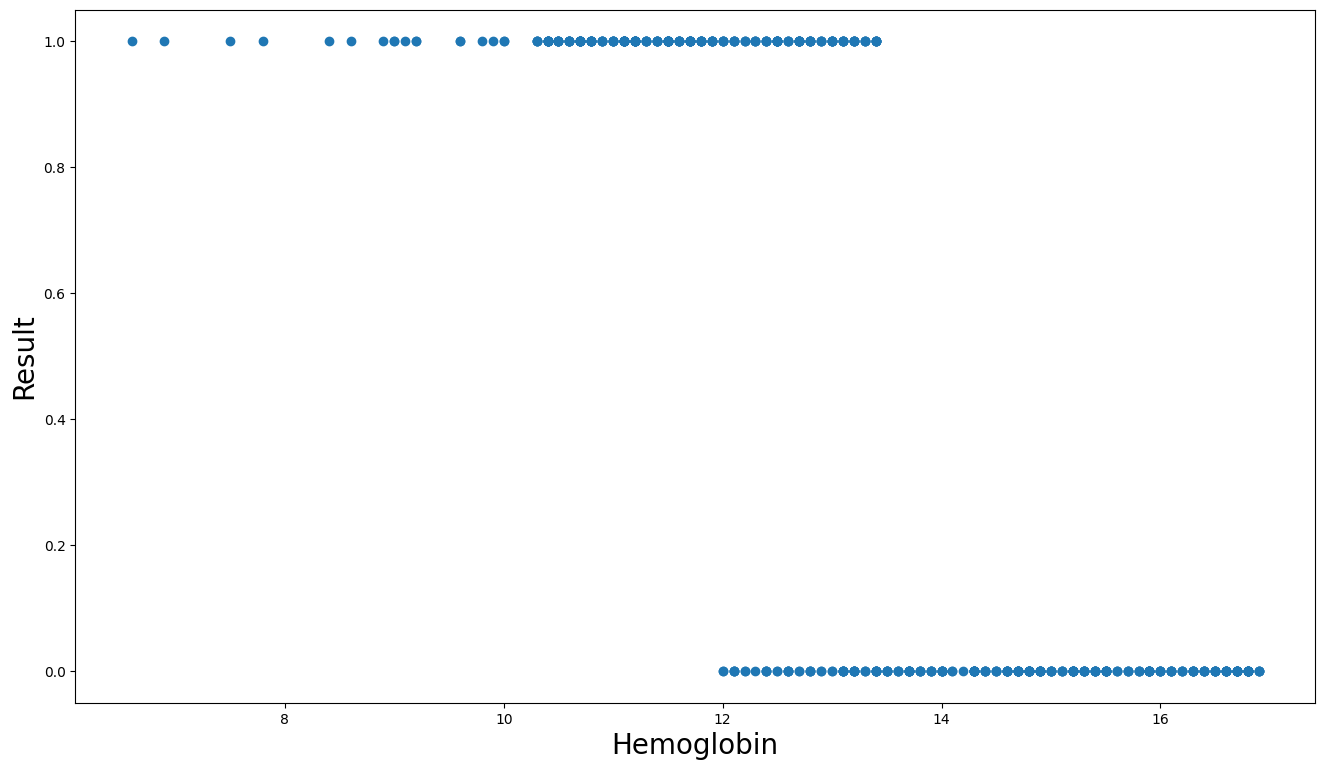

In [20]:
#Plotting Scatter Graph
plt.figure(figsize = (16, 9))
plt.scatter(df.Hemoglobin, df.Result)
plt.xlabel("Hemoglobin", size = 20)
plt.ylabel("Result", size = 20)

plt.show()

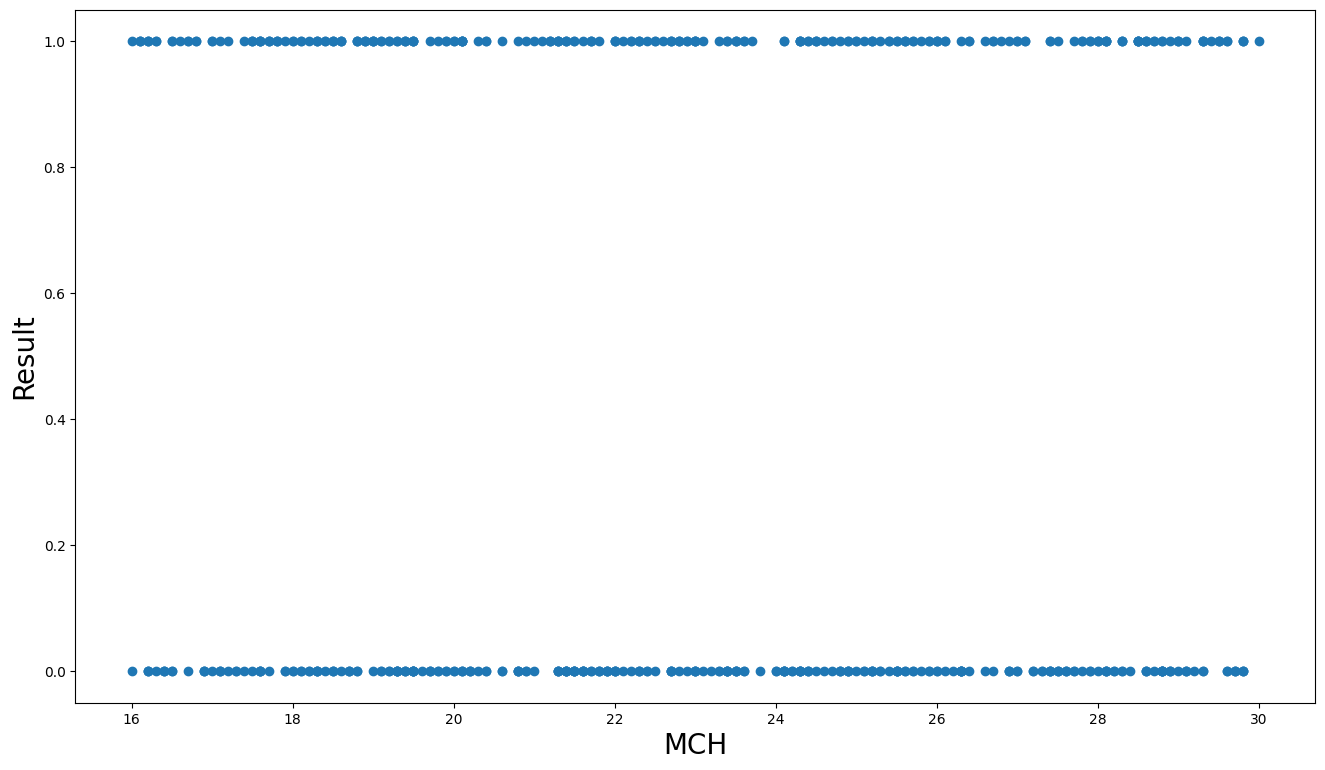

In [21]:
#Plotting Scatter Graph
plt.figure(figsize = (16, 9))
plt.scatter(df.MCH, df.Result)
plt.xlabel("MCH", size = 20)
plt.ylabel("Result", size = 20)

plt.show()

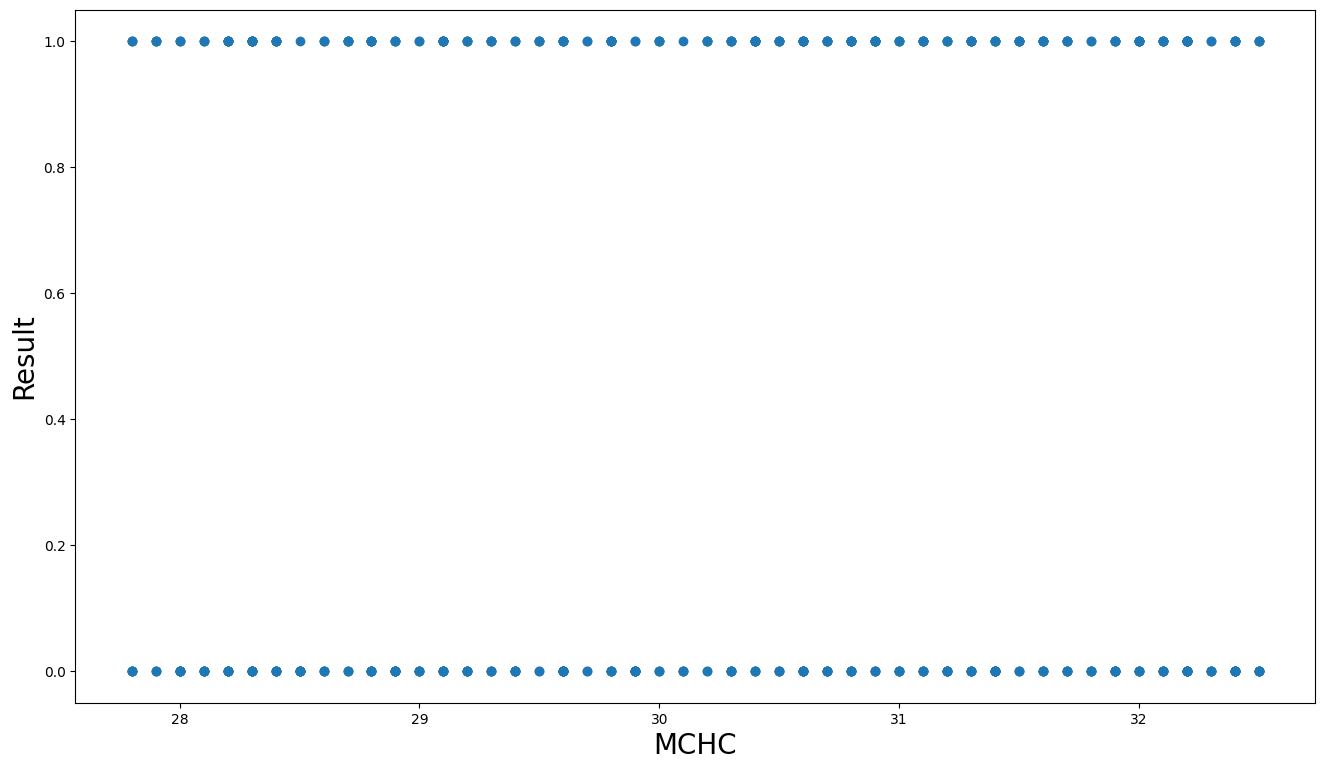

In [22]:
#Plotting Scatter Graph
plt.figure(figsize = (16, 9))
plt.scatter(df.MCHC, df.Result)
plt.xlabel("MCHC", size = 20)
plt.ylabel("Result", size = 20)

plt.show()

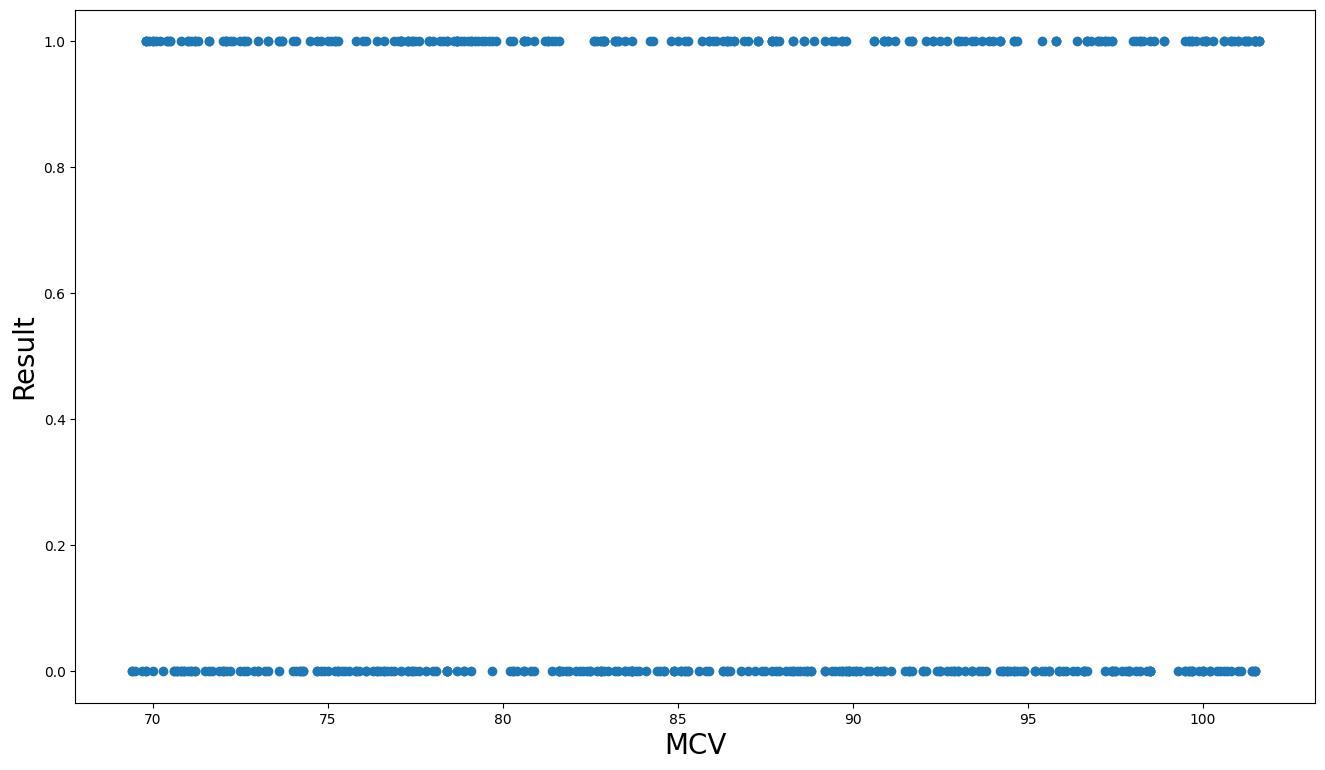

In [23]:
#PLotting Scatter Graph
plt.figure(figsize = (16, 9))
plt.scatter(df.MCV, df.Result)
plt.xlabel("MCV", size = 20)
plt.ylabel("Result", size = 20)


plt.show()

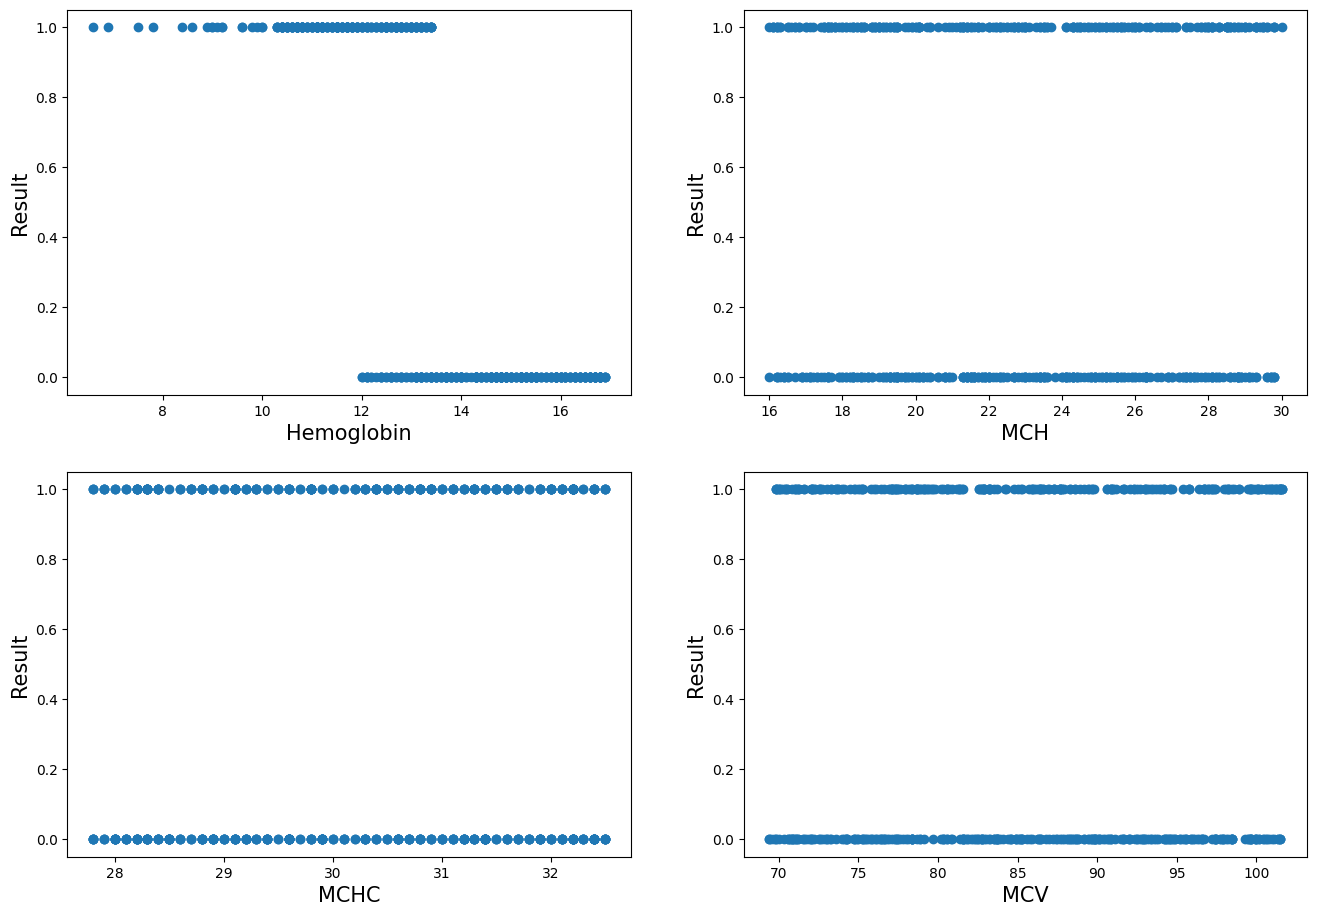

In [24]:
#Comparing all Scatter Graphs
plt.figure(figsize = (16, 11))


plt.subplot(2,2,1)
plt.scatter(df.Hemoglobin, df.Result)
plt.xlabel("Hemoglobin", size = 15)
plt.ylabel("Result", size = 15)


plt.subplot(2,2,2)
plt.scatter(df.MCH, df.Result)
plt.xlabel("MCH", size = 15)
plt.ylabel("Result", size = 15)


plt.subplot(2,2,3)
plt.scatter(df.MCHC, df.Result)
plt.xlabel("MCHC", size = 15)
plt.ylabel("Result", size = 15)


plt.subplot(2,2,4)
plt.scatter(df.MCV, df.Result)
plt.xlabel("MCV", size = 15)
plt.ylabel("Result", size = 15)

plt.show()

# Maching Learning

In [25]:
#Importing modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [26]:
#Creating an Object of class LogisticRegression
model = LogisticRegression()

In [27]:
#

In [28]:
#Using Hemoglobin as input variable and Result as Target variable
x = df.Hemoglobin
y = df.Result

In [29]:
x

0      14.9
1      15.9
2       9.0
3      14.9
4      14.7
       ... 
529    11.8
530    15.1
531    14.8
532    13.2
533    13.0
Name: Hemoglobin, Length: 534, dtype: float64

In [30]:
#Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 47)
x_train

14     15.9
488    12.0
478    10.6
347    12.6
533    13.0
       ... 
59     12.4
23     11.8
264     9.6
327    11.4
135    13.0
Name: Hemoglobin, Length: 373, dtype: float64

In [31]:
#Reshaping
xtrain_new = np.array(x_train).reshape(-1, 1) 
xtest_new = np.array(x_test).reshape(-1, 1) 
ytrain_new = np.array(y_train).reshape(-1, 1)
ytest_new = np.array(y_test).reshape(-1, 1) 

In [32]:
#Fitting the training data
model.fit(xtrain_new, ytrain_new)

C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
y_pred = model.predict(xtest_new)

In [34]:
#Training data accuracy
model.score(xtrain_new, ytrain_new)

0.8900804289544236

In [35]:
#Testing data accuracy
model.score(xtest_new, ytest_new)

0.9006211180124224

In [36]:
cm = confusion_matrix(ytest_new, y_pred)
cm

array([[76,  9],
       [ 7, 69]])

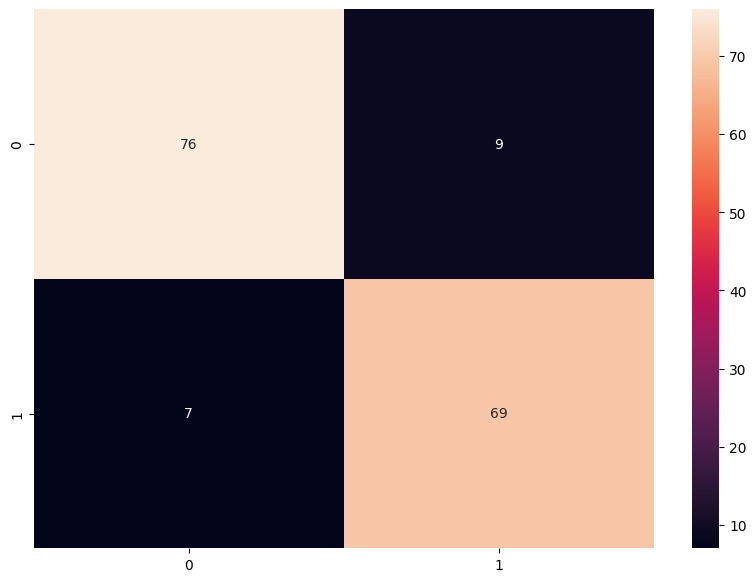

In [37]:
#Plotting Heatmap by Confusion Matrix
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True);
plt.show()

In [38]:
#Predicting Anemia using values from DataFrame
model.predict(np.array([12, 13, 14]).reshape(-1, 1))

array([1, 0, 0])

In [39]:
model.predict(np.array(x_test).reshape(-1, 1))

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1])

In [40]:
#Predicting Anemia using custom values
model.predict(np.array([11, 12.997, 13, 15, 10, 1, 100]).reshape(-1, 1))

array([1, 1, 0, 0, 1, 1, 0])

In [41]:
#

In [42]:
#Using Gender, Hemoglobin, MCH, MCHC, MCV as Input variable and Result as Target variable
ex = df[["Gender", "Hemoglobin", "MCH", "MCHC", "MCV"]]
why = df.Result

In [43]:
#Splitting training and testing data
ex_train, ex_test, why_train, why_test = train_test_split(ex, why, test_size = 0.3, random_state = 47)

In [44]:
#Fitting the training data
model.fit(ex_train, why_train)

LogisticRegression()

In [45]:
#Training data accuracy
model.score(ex_train, why_train)

0.9812332439678284

In [46]:
#Testing data accuracy
model.score(ex_test, why_test)

0.9813664596273292

In [47]:
cm2 = confusion_matrix(why_test, y_pred)
cm2

array([[76,  9],
       [ 7, 69]])

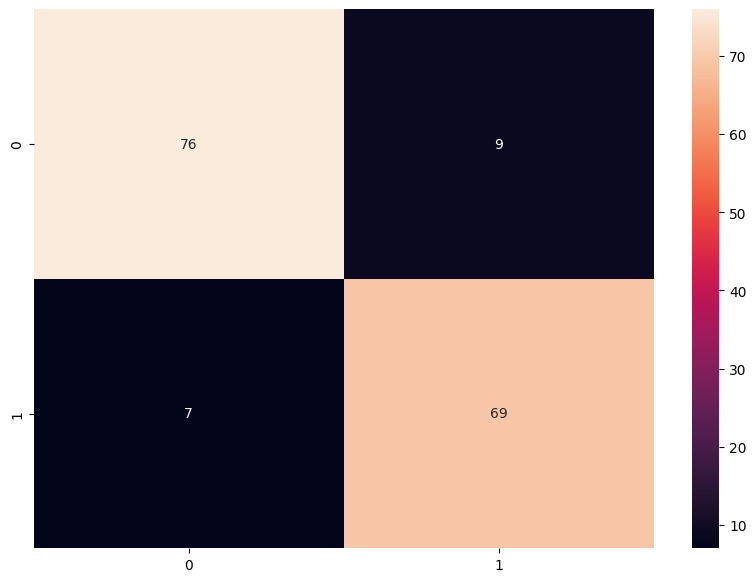

In [48]:
#Plotting Heatmap by Confusion Matrix
plt.figure(figsize = (10, 7))
sns.heatmap(cm2, annot = True)
plt.show()

In [49]:
model.predict(ex_test)

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1])

In [50]:
#Predicting Anemia
model.predict([[1, 15, 28, 31, 99], [0, 6, 16, 28, 70], [1, 11, 15, 28, 71], [0, 14, 26, 30, 95]])

C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0])

In [51]:
#END